 Clustering con el Modelo k-means al Dataframe Forbes 2023

 k-means es uno de los algoritmos de aprendizaje automático no supervisado más popular. El objetivo de k-means es simple: agrupa puntos de datos similares con el objetivo de descubrir patrones subyacentes. Para lograr este objetivo, k-means busca un número fijo (k) de agrupamientos (clústers) en el conjunto de datos .

![kmeans](image-1.png)   


Funcionamiento básico de k-means.

En k-means se define de inicio un número k, que se refiere al número de centroides en los que se dividirá el conjunto de datos. Cada centroide sería la ubicación que marca el centro de cada agrupación.

A cada punto se asigna uno de los grupos mediante la reducción de la suma de cuadrados en el grupo. Dicho de otra forma, el algoritmo k-means identifica k número de centroides, y luego asigna cada punto de los datos al grupo más cercano, mientras mantiene los centroides lo más pequeños posible.

Una vez se tiene cada punto asociado a un clúster, se puuede etiquetar en el dataframe original asociándolo a dicho grupo y “catalogando” por tanto los datos.

Datos de inicio: Dataframe forbes23.

Se Va a aplicar el algoritmo sobre un conjunto de datos deL Dataframe forbes 2023  revista de economia forbes para determinar cómo se agrupan usando k-means. 

De dichos datos, se buscaran patrones de agrupamiento entre dos señales elegidas, en este caso se selecciona la señal SALES (ventas de las principales empresas en cifras en millones de dolares) y la señal ASSETS (ganancias de las principales empresas en cifras en millones de dolares). Se cuenta con una dataframe con un total de 2000 registros que ya pasaron por el proceso de limpieza.

NOTA: Se puede aplicar k-means sobre todas las señales/variables necesarias, pero para poder visualizar los agrupamientos k-means en una gráfica 2-D se aplicara el algoritmo exclusivamente sobre la dos señales anteriormente detalladas.

In [96]:
# Carga de librerías.

import os # directorios de trabajo
import seaborn as sns
import numpy as np # metodos numericos y manipulación de array
from scipy.spatial import distance
import pandas as pd # Data frame
import matplotlib.pyplot as plt # componente grafico
from sklearn.preprocessing import MinMaxScaler # Preprocessing para normalizar los datos antes de aplicar al algoritmo
from sklearn.cluster import KMeans # KMeans para realizar el clustering

In [55]:
# Establecer directorio de trabajo (working directory) e importar el Dataframe forbes23

os.getcwd() 

'c:\\Users\\USUARIO\\OneDrive\\Documentos\\Uibero Ing de Software\\8 SEMESTRE\\Inteligencia_artificial-main'

In [56]:
# Mostrar los Archivos que hay en el ditrectorio de trabajo
os.listdir() 

['.git',
 '1. Introduccion.ipynb',
 '2. Numpy.ipynb',
 '3. PandasForbes.ipynb',
 'Aactividad 1.docx',
 'caracteristicas de vinos.csv',
 'cluster_k-means.ipynb',
 'Explicacion del modelo kmeans.ipynb',
 'Forbes',
 'forbes23.ipynb',
 'image-1.png',
 'image.png',
 'ipynb',
 'Mall_Customers.csv',
 'Project kmeans customer.ipynb',
 'pruebaforbes.ipynb']

In [57]:
# Importación de la base de datos

forbes23 = pd.read_csv('Forbes\Forbes2023.csv',encoding= 'latin-1',sep=';') 

In [58]:
forbes23

,Rank,Company Name,Country,Sales\n($millions),Profits\n($millions),Assets\n($millions),Market Value \nAs of 05/05/23 ($m)
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350,"489,5",7820,15600
1996,1996,Gap,United States,15620,-202,11390,3170
1997,1996,Yes Bank,India,3340,"91,6",43220,5600
1998,1999,BEKB-BCBE,Switzerland,556,"167,1",42970,2490


In [59]:
# método que devuelve la dimención del array en este caso serian 2000 empresas y 7 columnas
print(forbes23.shape) 
# muestra las columnas del DataFrame.
print(forbes23.columns) 

(2000, 7)
Index(['Rank', 'Company Name', 'Country', 'Sales\n($millions)',
       'Profits\n($millions)', 'Assets\n($millions)',
       'Market Value \nAs of 05/05/23 ($m)'],
      dtype='object')


In [60]:
### Proceso de Limpieza de Datos: Cambiar el nombre de las variables 
forbes23.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
forbes23.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [61]:
forbes23.head(n=10) # Top 10 de las empresas de Forbes 2023
#forbes23.tail(n=9) #Las últimas 5

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
5,6,Bank of America,United States,133840,28620,3194660,220820
6,7,Alphabet,United States,282850,58590,369490,1340530
7,8,ExxonMobil,United States,393160,61690,369370,439390
8,9,Microsoft,United States,207590,69020,380090,2309840
9,10,Apple,United States,385100,94320,332160,2746210


In [62]:
# Se Modifica el formato de los datos (Coerción de datos, quitar comas)

forbes23 = forbes23.replace(',','',regex= True) # regex: expresión regular
forbes23

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930,41800,3744300,399590
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470,156360,660990,2055220
2,3,ICBC,China,216770,52470,6116820,203010
3,4,China Construction Bank,China,203080,48250,4977480,172990
4,5,Agricultural Bank of China,China,186140,37920,5356860,141820
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350,4895,7820,15600
1996,1996,Gap,United States,15620,-202,11390,3170
1997,1996,Yes Bank,India,3340,916,43220,5600
1998,1999,BEKB-BCBE,Switzerland,556,1671,42970,2490


In [63]:
#preguntar si hay datos vacios o pedir suma, resultados sospechosos
forbes23.isna().sum() 

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [64]:
# sumar
forbes23['Sales'].sum()

50844922

Normalización de los datos.

Como ocurre con cualquier algoritmo de Machine Learning que utilice funciones de distancia, los datos deben ser normalizados antes de aplicarles el algoritmo. En este caso se utilizara la función MinMaxScaler() que normaliza todos los datos entre [0, 1].

In [65]:
# Se eliminan filas que tengan valor NaN.
df = forbes23.dropna()
df = df.reset_index(drop=True)

In [66]:
# se pregunta si alguno de los elementos de una lista esta vacio anidando con la funcion any
forbes23.isna().any().any()  


False

In [67]:
# filtrar datos mediante indices con la funcion iloc y cambiar el tipo de dato a float con la funcion astype.   
forbes23.iloc[:,3:] = forbes23.iloc[:,3:].astype(float)

In [68]:
# Se pregunta si hay datos vacios.
forbes23.isna().sum()  

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [69]:
forbes23['Profits'].sum()

7666268.0

In [70]:
forbes23.dtypes 

Rank              int64
Company          object
Country          object
Sales           float64
Profits          object
Assets          float64
Market_value    float64
dtype: object

In [71]:
#Coercionar datos

forbes23.iloc[:,3:].astype(float) 

,Sales,Profits,Assets,Market_value
0,179930.0,41800.0,3744300.0,399590.0
1,589470.0,156360.0,660990.0,2055220.0
2,216770.0,52470.0,6116820.0,203010.0
3,203080.0,48250.0,4977480.0,172990.0
4,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...
1995,5350.0,4895.0,7820.0,15600.0
1996,15620.0,-202.0,11390.0,3170.0
1997,3340.0,916.0,43220.0,5600.0
1998,556.0,1671.0,42970.0,2490.0


In [72]:
# Coercionar los datos de str a float
forbes23.iloc[:,3:] = forbes23.iloc[:,3:].astype(float) 

In [73]:
# Preguntar si hay datos vacios 

forbes23.isna().any() # Método de Pandas 

Rank            False
Company         False
Country         False
Sales           False
Profits         False
Assets          False
Market_value    False
dtype: bool

In [74]:
# se pregunta si alguno de los elementos de una lista esta vacio anidando con la funcion any
forbes23.isna().any().any()  


False

In [75]:
# Se Modifica el formato de los datos (Coerción de datos, quitar la  coma)

forbes23 = forbes23.replace(',','',regex= True) # regex: expresión regular
forbes23

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,4895.0,7820.0,15600.0
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0
1997,1996,Yes Bank,India,3340.0,916.0,43220.0,5600.0
1998,1999,BEKB-BCBE,Switzerland,556.0,1671.0,42970.0,2490.0


In [76]:
forbes23.isnull().sum()

Rank            0
Company         0
Country         0
Sales           0
Profits         0
Assets          0
Market_value    0
dtype: int64

In [77]:
### Proceso de Limpieza de Datos: Cambiar el nombre de las variables 
forbes23.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
forbes23.columns

Index(['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market_value'],
      dtype='object')

In [78]:
forbes23

,Rank,Company,Country,Sales,Profits,Assets,Market_value
0,1,JPMorgan Chase,United States,179930.0,41800.0,3744300.0,399590.0
1,2,Saudi Arabian Oil Company (Saudi Aramco),Saudi Arabia,589470.0,156360.0,660990.0,2055220.0
2,3,ICBC,China,216770.0,52470.0,6116820.0,203010.0
3,4,China Construction Bank,China,203080.0,48250.0,4977480.0,172990.0
4,5,Agricultural Bank of China,China,186140.0,37920.0,5356860.0,141820.0
...,...,...,...,...,...,...,...
1995,1996,Alfa Laval,Sweden,5350.0,4895.0,7820.0,15600.0
1996,1996,Gap,United States,15620.0,-202.0,11390.0,3170.0
1997,1996,Yes Bank,India,3340.0,916.0,43220.0,5600.0
1998,1999,BEKB-BCBE,Switzerland,556.0,1671.0,42970.0,2490.0


In [79]:
# La función describe de Pandas regresa estadísticas descriptivas incluyendo: media, meadiana, máx, mín, std y conteos para una columna en particular de los datos. Solo regresa los valores de estas estadísticas para las columnas numéricas.
forbes23.columns = ['Rank','Company','Country','Sales','Profits','Assets','Market_value']
forbes23.columns
forbes23.describe() 

,Rank,Sales,Profits,Assets,Market_value
count,2000.000000,2000.000000,2000.000000,2.000000e+03,2.000000e+03
mean,1000.309500,25422.461000,3833.134000,1.158463e+05,3.699562e+04
std,577.395083,46517.172959,6919.101006,3.722422e+05,1.142306e+05
min,1.000000,-109990.000000,-76170.000000,1.050000e+02,3.200000e+01
25%,500.750000,5770.000000,1220.000000,1.472000e+04,6.860000e+03
50%,1000.500000,12500.000000,2575.500000,3.165500e+04,1.531000e+04
75%,1499.500000,25170.000000,5872.750000,7.697250e+04,3.404250e+04
max,1999.000000,611290.000000,156360.000000,6.116820e+06,2.746210e+06


In [80]:
print(forbes23.groupby('Sales' ).size()) #Para saber cuantos registros tiene de cada uno

Sales
-109990.0    1
-74520.0     1
-38600.0     1
-25510.0     1
-9090.0      1
            ..
 453560.0    1
 457400.0    1
 524900.0    1
 589470.0    1
 611290.0    1
Length: 1568, dtype: int64


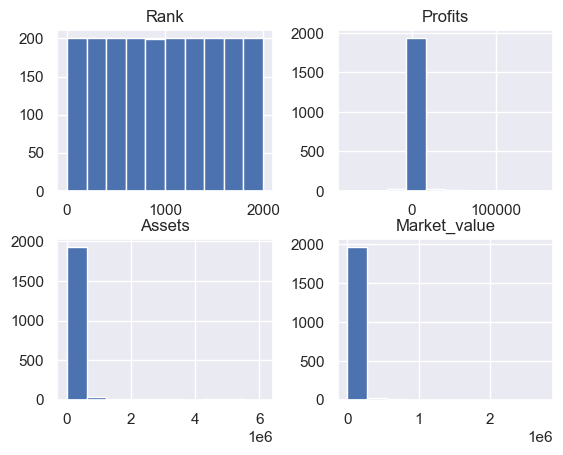

In [81]:
forbes23.drop(['Sales'], axis=1).hist() #Ver graficamente los datos para tener una idea de la dispersión de los mismos:
plt.show()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categor

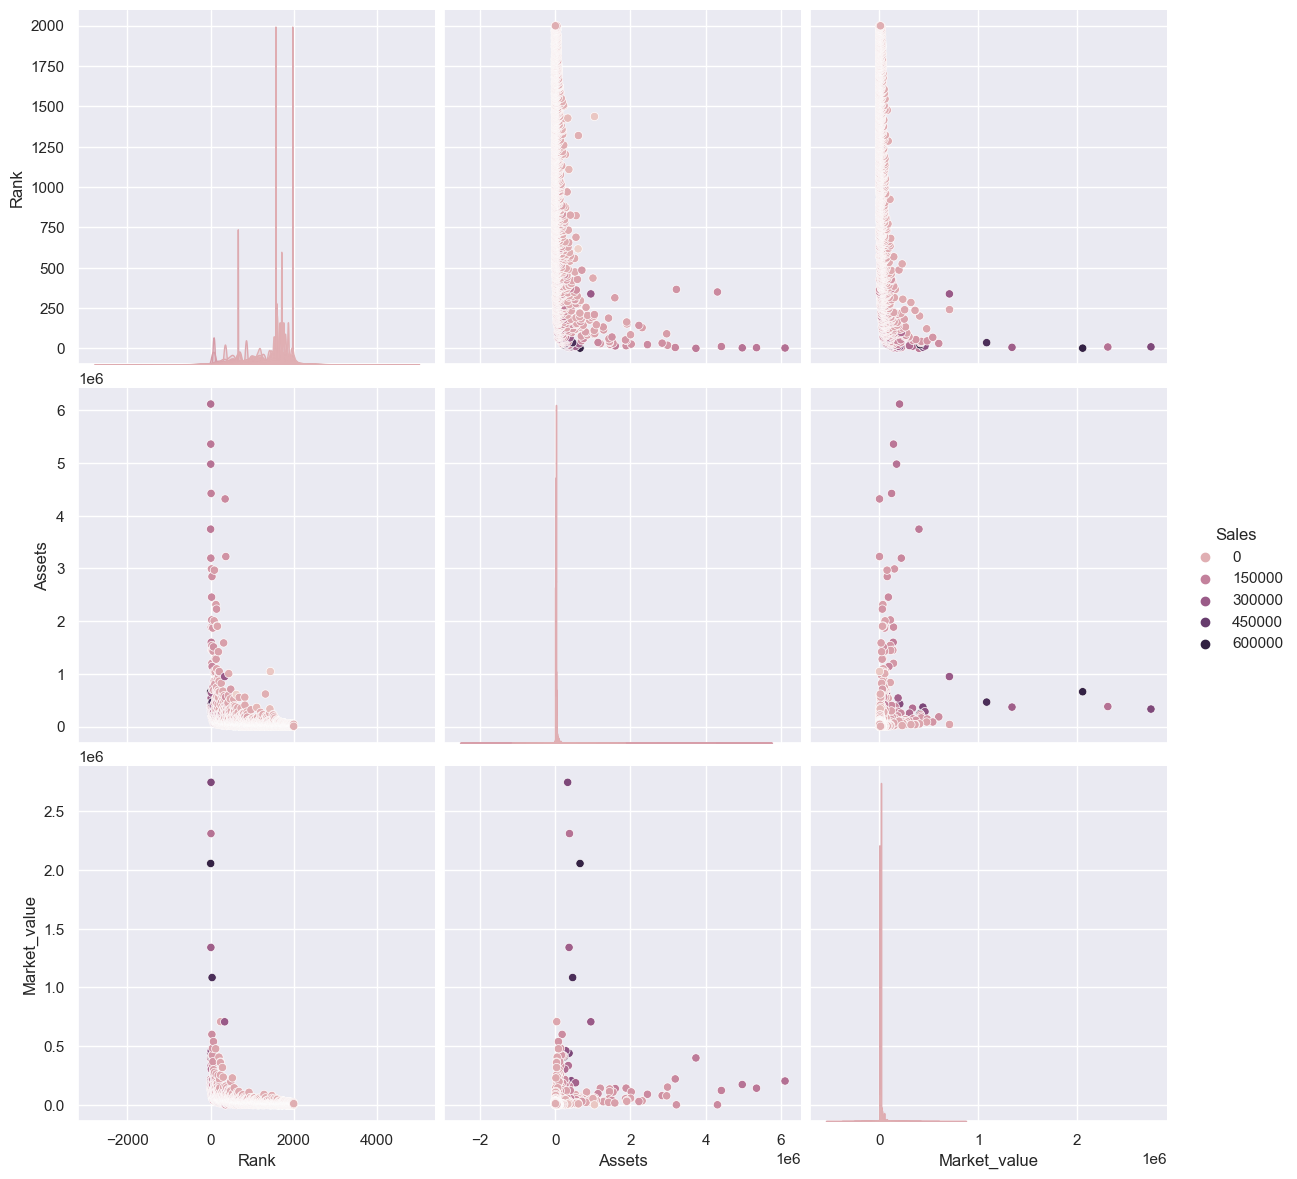

In [82]:

import seaborn as sb  
sb.pairplot(forbes23.dropna(), hue='Sales',size=4,vars=["Rank","Assets","Market_value"],kind='scatter')
# En este caso se seleccionan 3 dimensiones: Rank, Assets y Market_value y se cruzan para ver si se ve alguna pista de su agrupación y la relación con sus Sales(ventas).

Revisando la gráfica no pareciera que haya algún tipo de agrupación o correlación entre lsales (ventas) y sus variables.

In [83]:
# Definir la entrada
# Se Concreta la estructura de datos que se utilizara para alimentar el algoritmo. Como se ve, sólo se cargo las columnas Rank, Assets y Market_value en la variable X.

X = np.array(forbes23[["Rank","Assets","Market_value"]])
y = np.array(forbes23['Sales'])
X.shape

(2000, 3)

Representación gráfica de los datos

Ahora se va ha echar un vistazo a la representación gráfica de los datos. En el eje x se representa las ventas  (Sales) y en el eje y Assets (activos):

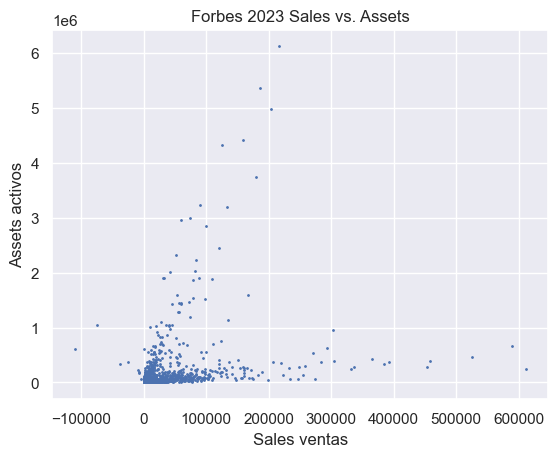

In [84]:
#%% Representación gráfica de los datos.
df_escalado=forbes23
x = df_escalado['Sales'].values
y = df_escalado['Assets'].values
plt.xlabel('Sales ventas')
plt.ylabel('Assets activos')
plt.title('Forbes 2023 Sales vs. Assets')
plt.plot(x,y,'o',markersize=1)

Obtener el valor K
Se hallara el valor de K haciendo una gráfica e intentando hallar el “punto de codo” que se comento antes. Este es el resultado:

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\skle

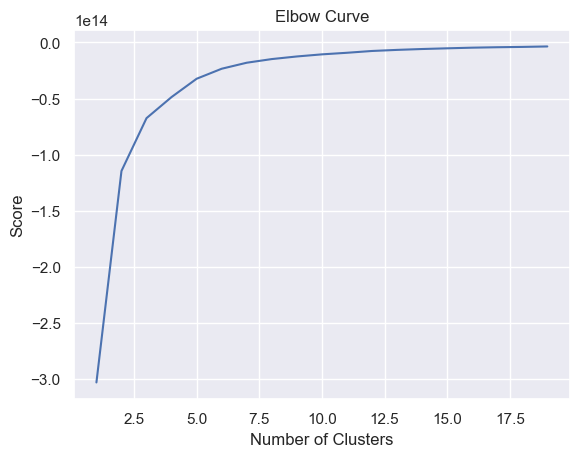

In [85]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

Realmente la curva es bastante “suave”. Considero a 5 como un buen número para K. 

Se ejecuta K-Means
Se Ejecutara el algoritmo para 5 clusters y se obtienen las etiquetas y los centroids.

In [86]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[1.05685376e+03 4.92861640e+04 2.95193817e+04]
 [6.25000000e+01 4.82244667e+06 1.73431833e+05]
 [9.21538462e+01 1.98921154e+06 7.61021923e+04]
 [3.08384615e+02 5.54072308e+05 7.32128942e+04]
 [7.00000000e+00 4.35682500e+05 2.11295000e+06]]


Representación gráfica de los clústeres k-means

Una vez con los datos etiquetados, podemos visualizar gráficamente en dos dimensiones el clustering realizado por k-means, ya que se usaron sólo dos variables. 

In [95]:

# df Conjunto de datos de entrada
forbes23 = np.random.randint(1, 101, size=(20, 2))
print(forbes23) 

[[37 28]
 [26 62]
 [21 20]
 [17 80]
 [76 12]
 [81 87]
 [69 71]
 [10 66]
 [57  6]
 [84 87]
 [33  6]
 [37  2]
 [ 5 80]
 [90 15]
 [85 91]
 [35 66]
 [90 85]
 [98 77]
 [39 20]
 [ 7 37]]


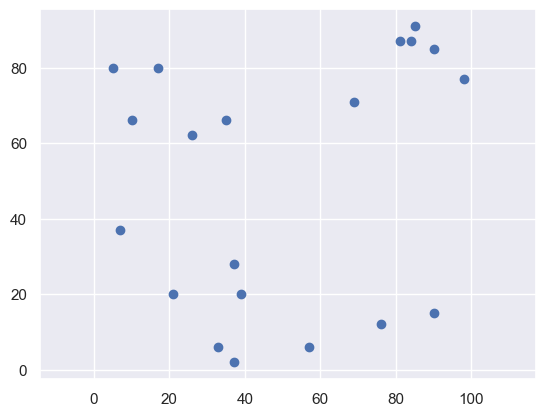

In [97]:
# Realicemos un scatterplo
sns.set()

plt.axis('equal') #Misma escala de los ejes
plt.scatter(forbes23[:,0],forbes23[:,1])

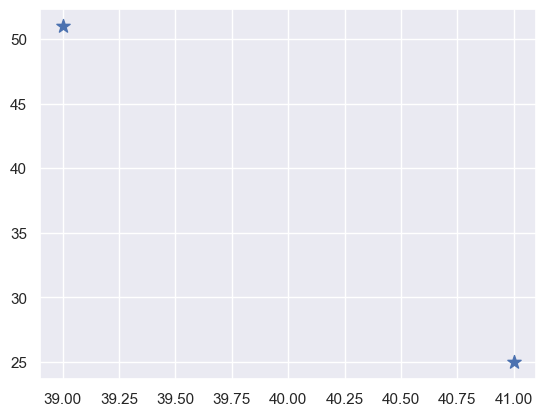

[41 25] [39 51]


In [89]:
# Iniciamos los centroides
ck = np.random.randint(np.min(forbes23),np.max(forbes23), size=(2, 2))

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

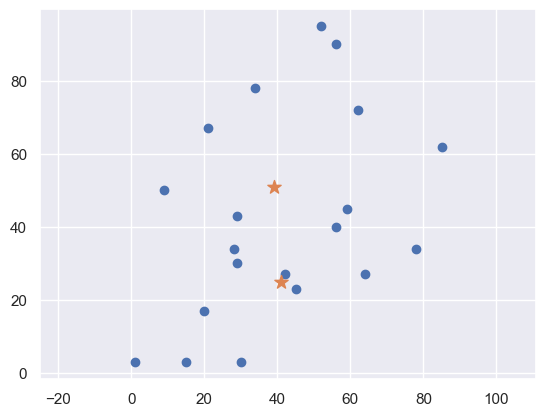

[41 25] [39 51]


In [90]:
plt.axis('equal') #Misma escala de los ejes
plt.scatter(forbes23[:,0],forbes23[:,1])

plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.show()
print(ck[0,:],ck[1,:])

[41 25] [39 51]
iteration:  4


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

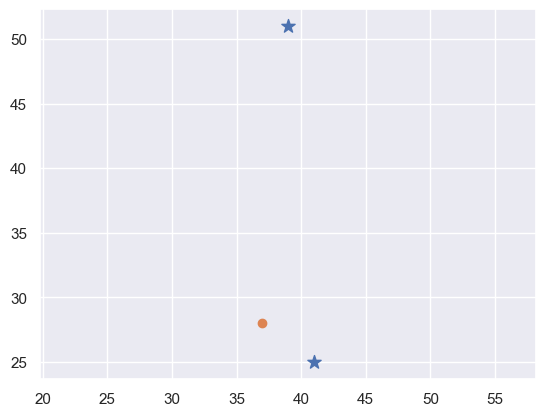

In [100]:
# Calcular las distancias de cada dato al centroide y reasignar a los conjuntos C1 y C2

for iteration in range(5):
    C1 = []
    C2 = []
i=0
print(ck[0,:],ck[1,:])
for x in forbes23:
    dst1 = distance.euclidean(forbes23[i,:], ck[0,:])
    dst2 = distance.euclidean(forbes23[i,:], ck[1,:])
if dst1 < dst2:
    C1.append(forbes23[i,:])
else: 
    C2.append(forbes23[i,:])
    i = i+1

print('iteration: ', iteration)

AC1=np.array(C1)
AC2=np.array(C2)

plt.axis('equal')
plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
plt.show()

# Se actualizan las coordenadas de los centroides
ck[0,0] = np.mean(AC1[:,0])
ck[0,1] = np.mean(AC1[:,1])

ck[1,0] = np.mean(AC2[:,0])
ck[1,1] = np.mean(AC2[:,1])

El dato Xn pertenece al cluster:2 con centroide [70 57]


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

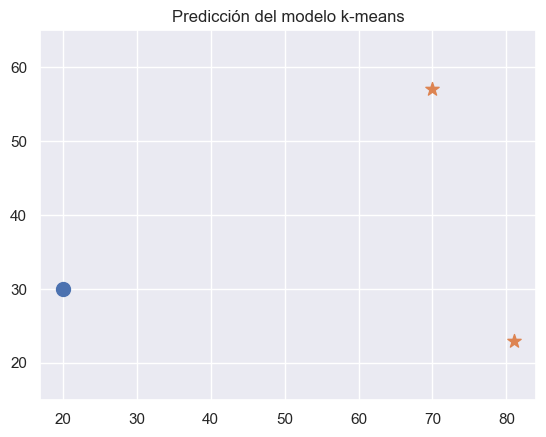

In [ ]:
# Prediccion del Modelo 
# Dado un nuevo dato xn, se asigna al conjunto C1 o C2 teniendo en cuenta la distancia
# del elemento a los centroides de cada grupo

# xn, nuevo dato
xn = (20,30)

# Distancia de xn a cada centroide
dst1 = distance.euclidean(xn, ck[0,:])
dst2 = distance.euclidean(xn, ck[1,:])

if dst1 < dst2:
    print('El dato Xn pertenece al cluster:{} con centroide {}'.format(1,ck[0,:]))
else:
    print('El dato Xn pertenece al cluster:{} con centroide {}'.format(2,ck[1,:]))

plt.axis('equal')
plt.title('Predicción del modelo k-means')
plt.scatter(xn[0],xn[1],s=100,marker='o')
plt.scatter(ck[:,0],ck[:,1],s=100,marker='*')
plt.scatter(AC1[:,0],AC1[:,1], label='True Position')
plt.scatter(AC2[:,0],AC2[:,1], label='True Position')
plt.show()